#                                                           Apple Stock 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path="AAPL (4) (3).csv"
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
# Convert Date to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values('Date').reset_index(drop=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

In [5]:
df['Daily_Return'] = df['Close'].pct_change()

In [6]:
# Moving Averages
df['MA_7'] = df['Close'].rolling(7).mean()
df['MA_30'] = df['Close'].rolling(30).mean()

In [7]:
# Volatility (30-day rolling standard deviation of returns)
df['Volatility_30'] = df['Daily_Return'].rolling(window=30).std()

In [8]:
df = df.dropna().reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA_7,MA_30,Volatility_30
0,2012-02-15,0.076545,0.076403,0.068510,0.064929,61.436600,376530000,-0.099134,0.061305,0.034770,0.184868
1,2012-02-16,0.062750,0.063497,0.062222,0.067680,61.997032,236138000,0.042375,0.064195,0.036563,0.184787
2,2012-02-17,0.069787,0.065234,0.070599,0.067626,61.985954,133951300,-0.000806,0.066397,0.038262,0.183415
3,2012-02-21,0.072072,0.069504,0.072941,0.075340,63.557446,151398800,0.114078,0.068274,0.040129,0.182763
4,2012-02-22,0.075830,0.069889,0.075974,0.074244,63.334015,120825600,-0.014559,0.069973,0.041974,0.182670


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,MA_7,MA_30,Volatility_30
count,1951,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1.951000e+03,1951.000000,1951.000000,1951.000000,1951.000000
mean,2016-02-07 01:51:27.032291072,0.310751,0.306964,0.311044,0.309279,121.486431,5.806728e+07,0.002101,0.307903,0.302696,0.047217
min,2012-02-15 00:00:00,0.000000,0.000000,0.000000,0.000000,48.921928,1.136200e+07,-1.000000,0.007148,0.018148,0.009641
25%,2014-03-10 12:00:00,0.143975,0.139881,0.143712,0.142075,78.093590,2.728950e+07,-0.014816,0.140060,0.132346,0.021481
50%,2016-02-16 00:00:00,0.249838,0.246890,0.250126,0.248293,106.370323,4.192530e+07,0.001067,0.247450,0.243833,0.028814
75%,2018-01-22 12:00:00,0.474789,0.475757,0.473351,0.475077,162.380867,7.107915e+07,0.018663,0.475774,0.471634,0.046132
max,2019-12-30 00:00:00,1.000000,1.000000,1.000000,1.000000,289.522614,3.765300e+08,2.114997,0.974741,0.917939,0.488047
std,NaN,0.212050,0.212857,0.212913,0.212462,51.986158,4.618079e+07,0.083990,0.210726,0.205379,0.063480


In [11]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily_Return     0
MA_7             0
MA_30            0
Volatility_30    0
dtype: int64

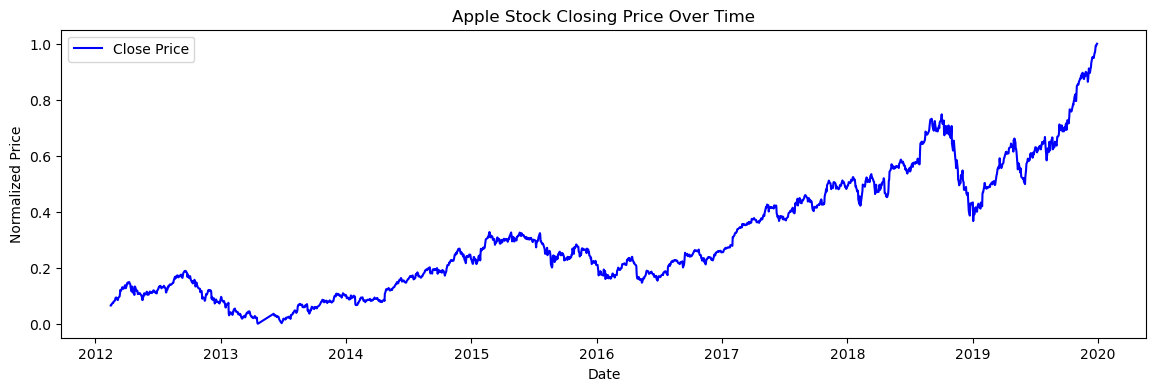

In [12]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

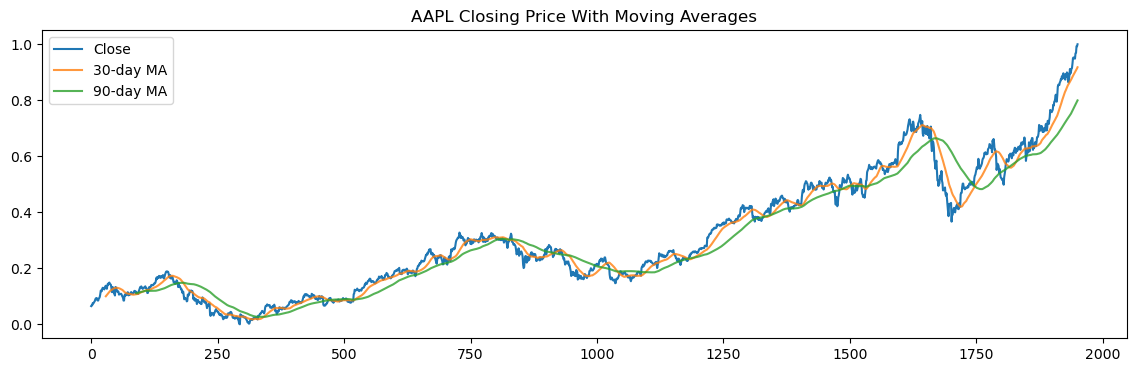

In [13]:
plt.figure(figsize=(14,4))
plt.plot(df['Close'], label='Close')
plt.plot(df['Close'].rolling(window=30).mean(), label='30-day MA', alpha=0.8)
plt.plot(df['Close'].rolling(window=90).mean(), label='90-day MA', alpha=0.8)
plt.title("AAPL Closing Price With Moving Averages")
plt.legend()
plt.show()

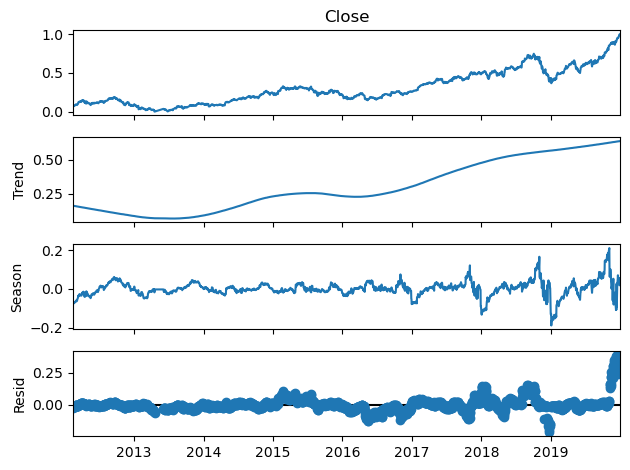

In [14]:
from statsmodels.tsa.seasonal import STL

s = df[['Date','Close']].copy()
s = s.dropna().set_index('Date')['Close']
s = s.replace([np.inf, -np.inf], np.nan).dropna()

period = min(252, len(s)//2)

stl = STL(s, period=period, robust=True)
res = stl.fit()
res.plot()
plt.show()

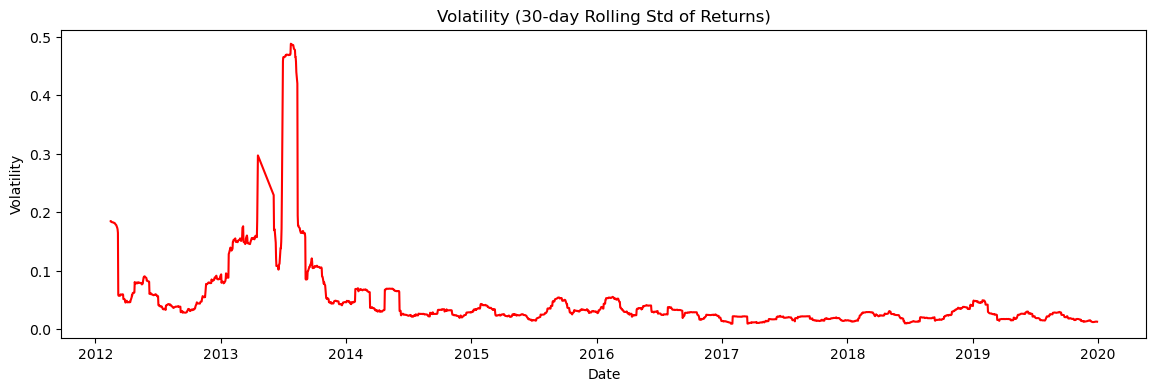

In [15]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'], df['Volatility_30'], color='red')
plt.title("Volatility (30-day Rolling Std of Returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

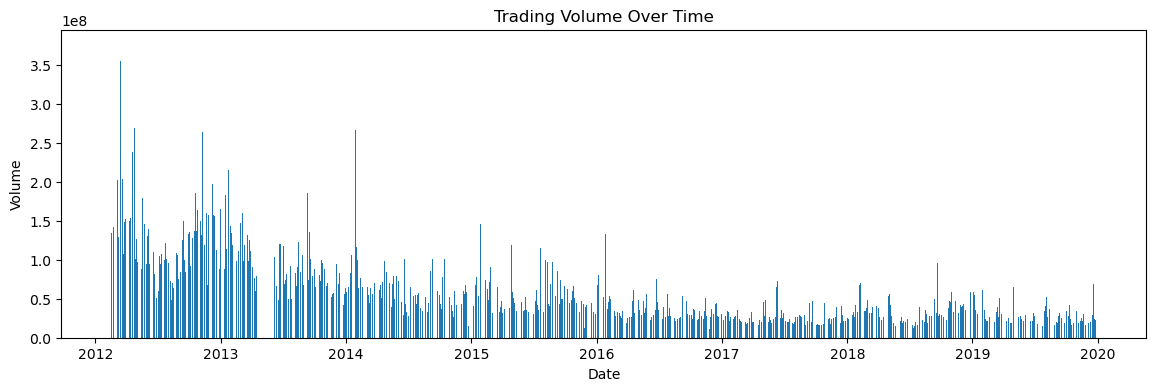

In [16]:
plt.figure(figsize=(14,4))
plt.bar(df['Date'], df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

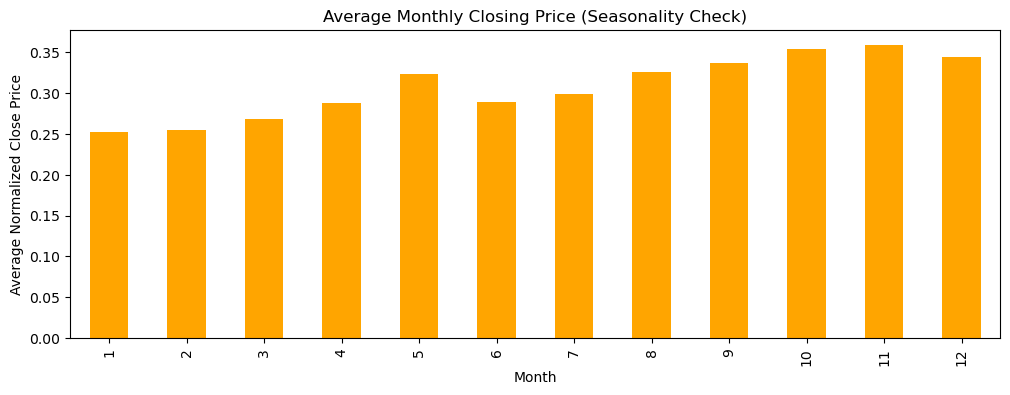

In [17]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(12,4))
monthly_avg.plot(kind='bar', color='orange')
plt.title("Average Monthly Closing Price (Seasonality Check)")
plt.xlabel("Month")
plt.ylabel("Average Normalized Close Price")
plt.show()

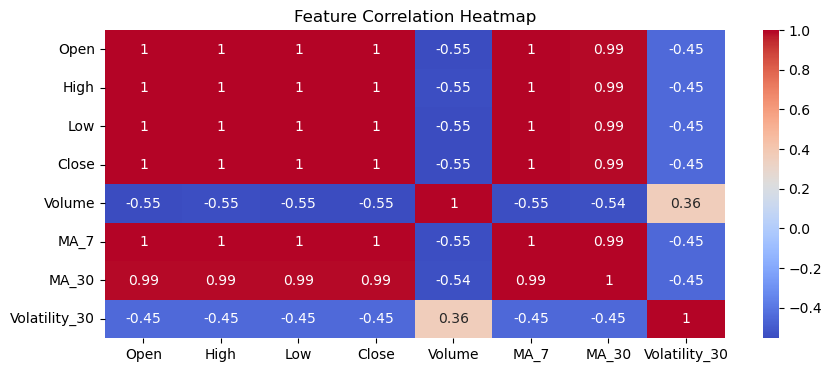

In [18]:
plt.figure(figsize=(10,4))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_7', 'MA_30', 'Volatility_30']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Statistical Models: ARIMA & SARIMA

In [19]:
# Train-Test Split (80-20 split without shuffling)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size],df.iloc[train_size:]

train_close = df['Close'][:-30]
test_close = df['Close'][-30:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

arima_model = ARIMA(train_close, order=(5,1,0)) 
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=30)

In [21]:
rmse = np.sqrt(mean_squared_error(test_close, arima_forecast))
mae = mean_absolute_error(test_close, arima_forecast)
print("ARIMA RMSE:", rmse)
print("ARIMA MAE:", mae)

ARIMA RMSE: 0.05607437700348431
ARIMA MAE: 0.041843078101588056


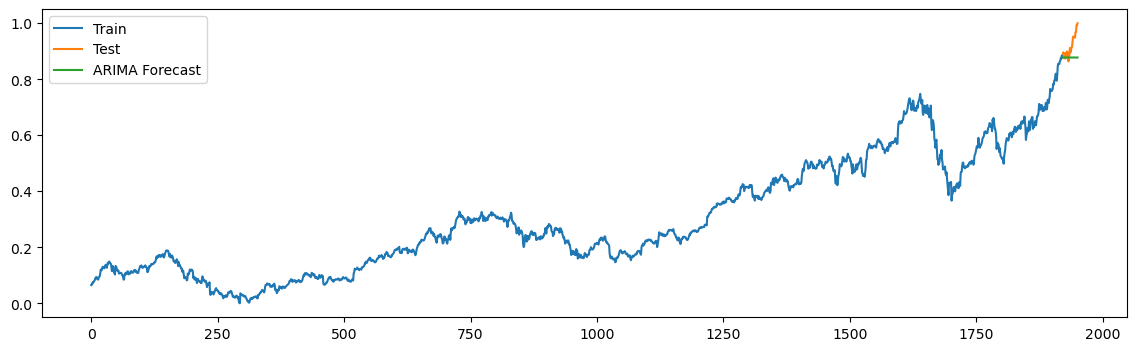

In [22]:
plt.figure(figsize=(14,4))
plt.plot(train_close, label="Train")
plt.plot(test_close, label="Test")
plt.plot( arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_close, order=(5,1,0), seasonal_order=(1,0,1,12))
sarima_fit = sarima_model.fit(disp=False)

sarima_forecast = sarima_fit.forecast(steps=30)

In [24]:
rmse = np.sqrt(mean_squared_error(test_close, sarima_forecast))
mae = mean_absolute_error(test_close, sarima_forecast)
print("SARIMA RMSE:", rmse)
print("SARIMA MAE:", mae)

SARIMA RMSE: 0.055406783835931124
SARIMA MAE: 0.04121446140544637


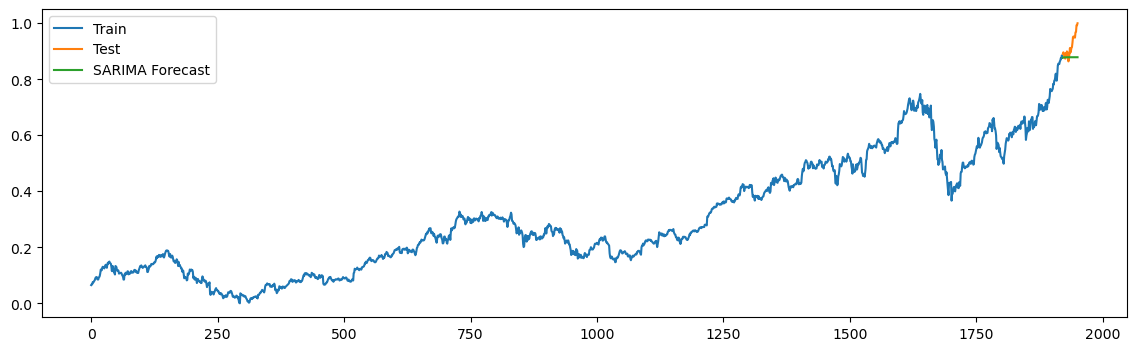

In [25]:
plt.figure(figsize=(14,4))
plt.plot(train_close, label="Train")
plt.plot(test_close, label="Test")
plt.plot( sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.show()

In [26]:
results = {"ARIMA": [np.sqrt(mean_squared_error(test_close, arima_forecast)),mean_absolute_error(test_close, arima_forecast)],
           "SARIMA": [np.sqrt(mean_squared_error(test_close, sarima_forecast)),mean_absolute_error(test_close, sarima_forecast)],}

In [27]:
results_df = pd.DataFrame(results, index=["RMSE", "MAE"]).T
print(results_df)

            RMSE       MAE
ARIMA   0.056074  0.041843
SARIMA  0.055407  0.041214


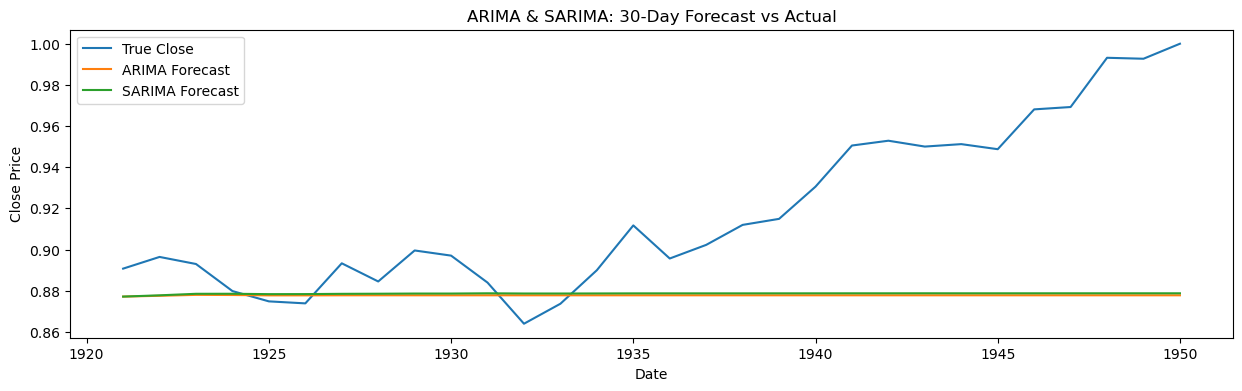

In [28]:
test_dates = df.index[-30:]

plt.figure(figsize=(15,4))
plt.plot(test_dates, df['Close'][-30:], label='True Close')
plt.plot(test_dates, arima_forecast, label='ARIMA Forecast')
plt.plot(test_dates, sarima_forecast, label='SARIMA Forecast')
plt.title('ARIMA & SARIMA: 30-Day Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [29]:
! pip install streamlit

In [30]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")


st.title("📈 AAPL Stock Price Forecasting App ")


uploaded_file = "AAPL (4) (3).csv"  #

df = pd.read_csv(uploaded_file)

df.columns = df.columns.str.strip()
if "Date" not in df.columns:
    st.error(" The CSV must contain a 'Date' column.")
    st.stop()

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
df = df.sort_values("Date")
min_date = df["Date"].min().date()
max_date = df["Date"].max().date()

start_date = st.sidebar.date_input("Start date", min_date, min_value=min_date, max_value=max_date)
end_date = st.sidebar.date_input("End date", max_date, min_value=min_date, max_value=max_date)

if start_date > end_date:
    st.error(" End date must be after start date.")
    st.stop()

filtered_df = df[(df["Date"] >= pd.to_datetime(start_date)) & (df["Date"] <= pd.to_datetime(end_date))]

st.subheader("📊 Historical AAPL Stock Prices")
st.line_chart(filtered_df.set_index("Date")["Close"])

st.subheader(" ARIMA 30-Day Forecast")

data_series = filtered_df["Close"]

try:
    model = ARIMA(data_series, order=(5, 1, 0))
    model_fit = model.fit()

    forecast_steps = 30
    forecast = model_fit.forecast(steps=forecast_steps)


    future_dates = pd.date_range(filtered_df["Date"].max() + timedelta(days=1), periods=forecast_steps)
    forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Close": forecast})

    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(filtered_df["Date"], filtered_df["Close"], label="Historical", color="blue")
    ax.plot(forecast_df["Date"], forecast_df["Predicted Close"], label="Forecast", color="red")
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.set_title("AAPL Stock Price Forecast (Next 30 Days)")
    ax.legend()
    st.pyplot(fig)

    st.write("### 📅 Forecasted Prices")
    st.dataframe(forecast_df)

except Exception as e:
    st.error(f"Model training or forecasting failed: {e}")

Writing app.py


In [31]:
!wget  -q -o - ipv4.canhanzip.com

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501